신약의 투여 전과 투여 후를 비교하기 위해 100명의 가상 데이터를 생성하고, 그 데이터를 사용하여 t-test를 수행한 다음, 결과의 p-value를 시각화하는 Python 코드 예제입니다.

1단계: 데이터 생성
신약 투여 전과 투여 후의 데이터를 각각 100명 분량으로 생성합니다. 이 예에서는 투여 전 데이터를 정규 분포
𝑁
(
0
,
1
)
N(0,1)을 따르게 하고, 투여 후 데이터는 투여의 효과를 모사하기 위해 평균이 약간 증가한 정규 분포
𝑁
(
0.5
,
1
)
N(0.5,1)를 사용합니다.

2단계: t-test 수행
생성된 데이터에 대해 독립 표본 t-test를 수행하여 투여 전과 투여 후의 평균 차이가 통계적으로 유의미한지 검정합니다.

3단계: 결과 시각화
t-test의 결과를 바 차트로 시각화하여 p-value를 표시합니다. 이는 데이터에 대한 처리 효과를 빠르게 이해하는 데 도움이 됩니다.

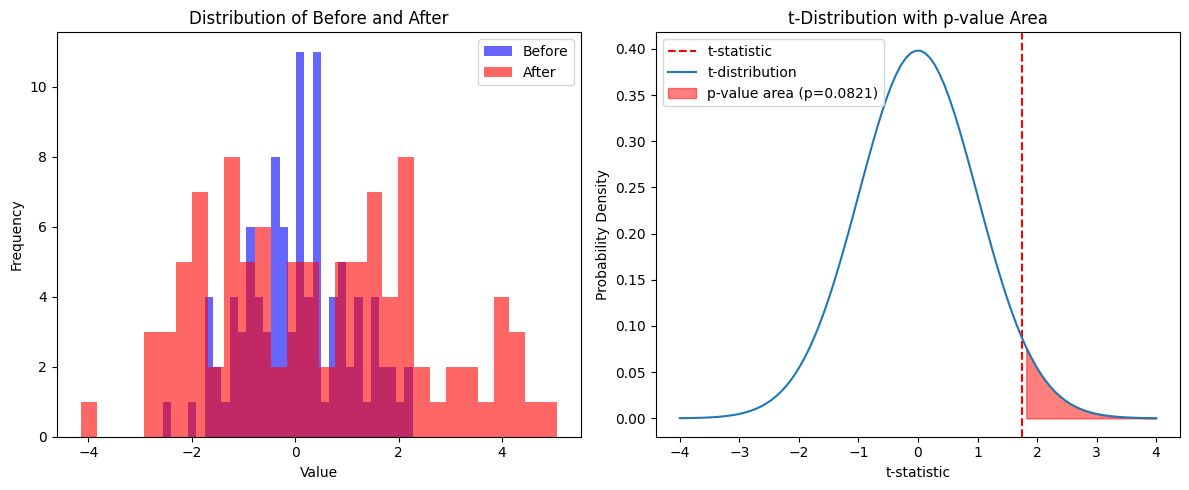

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
before = np.random.normal(0, 1, 100)
after = np.random.normal(0.3, 2, 100)

# 독립 표본 t-test 수행
t_stat, p_value = stats.ttest_ind(after, before)

# 데이터 분포 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 그래프: before와 after의 히스토그램
ax[0].hist(before, color='blue', alpha=0.6, bins=30, label='Before')
ax[0].hist(after, color='red', alpha=0.6, bins=30, label='After')
ax[0].legend()
ax[0].set_title('Distribution of Before and After')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency')

# 두 번째 그래프: t-분포와 p-value
x = np.linspace(-4, 4, 100)
tdist = stats.t.pdf(x, df=len(before)+len(after)-2)  # 자유도 계산
ax[1].axvline(t_stat, color='red', linestyle='--', label='t-statistic')
ax[1].plot(x, tdist, label='t-distribution')
ax[1].fill_between(x, tdist, where=(x >= t_stat), color='red', alpha=0.5, label=f'p-value area (p={p_value:.4f})')
ax[1].legend()
ax[1].set_title('t-Distribution with p-value Area')
ax[1].set_xlabel('t-statistic')
ax[1].set_ylabel('Probability Density')

plt.tight_layout()
plt.show()



In [ ]:
t_stat, p_value

(1.7473440578718433, 0.08212802905059749)

In [ ]:
import pandas as pd
pd.DataFrame(np.stack((before,after)), index =['Before', 'After']).round(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Before,2.0,0.0,1.0,2.0,2.0,-1.0,1.0,-0.0,-0.0,0.0,...,-0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
After,4.0,-2.0,-2.0,2.0,-2.0,4.0,-1.0,-1.0,4.0,3.0,...,-2.0,1.0,0.0,-2.0,1.0,-0.0,2.0,2.0,5.0,3.0
